In [ ]:
# Predicting Titanic survivors using scikit-learn

In [577]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import seaborn as sns
plt.style.use('seaborn')
from sklearn.preprocessing import Imputer 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet 
from sklearn.ensemble import RandomForestClassifier
import random

In [578]:
train = pd.read_csv('train.csv', index_col = 0) 

In [579]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [580]:
# The dependent variable is Survived. The independent variables that, logically thinking, will have an impact are 
# Sex, Age, Pclass, Cabin, SibSp, Parch. 

In [581]:
train.shape

(891, 11)

In [582]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [583]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [584]:
train[train == 'NaN'] = np.nan
# Print the number of NaNs
print(train.isnull().sum())
# Class 3 ticket holders had no cabin 

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


C:\Users\Jaspe\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [585]:
# Replace NA by 28, the median of Age 
train.Age = train.Age.fillna(train.Age.median())
# Replace NA by I, Illegal or unknows embarkement place 
train.Embarked = train.Embarked.fillna('I')

In [586]:
train[train=='NaN'] = np.nan
print(train.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F99363C518>,
      dtype=object)

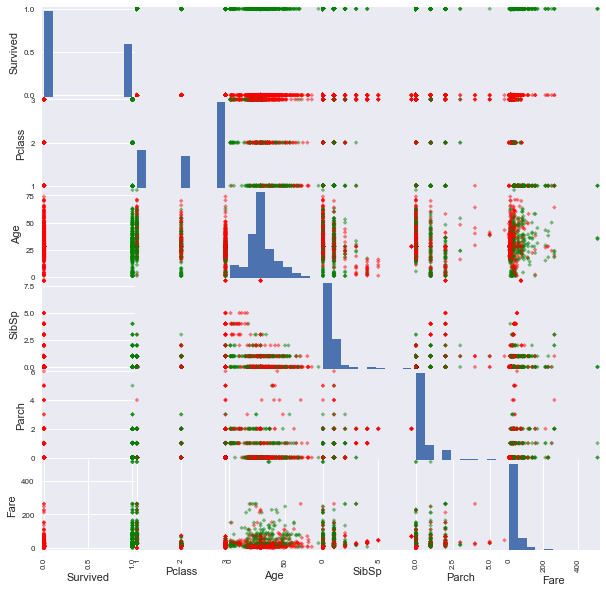

In [587]:
colors=['red','green']
pd.plotting.scatter_matrix(train, figsize = [10,10], marker = 'D', s = 10, c=train.Survived.apply(lambda x:colors[x]))

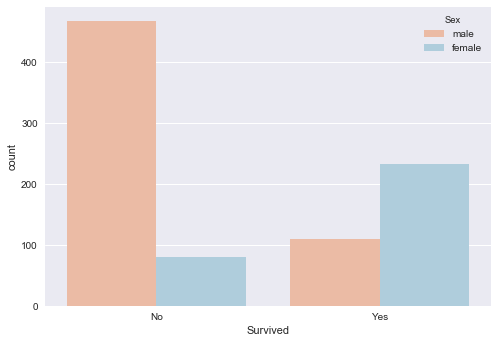

In [588]:
plt.figure()
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [589]:
# Most females survived and most males died as can be seen from the graph above.

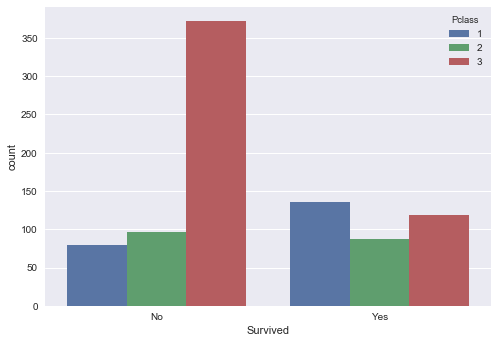

In [590]:
plt.figure()
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [591]:
# Most people from the 3rd class died. However, the number of people that survived from each class is almost the same. 
# A few more people from 1st class survived.

In [592]:
train = pd.get_dummies(train, prefix = ['Sex'],columns=['Sex'], drop_first = True)
train = pd.get_dummies(train, prefix = ['Pclass'],columns=['Pclass'], drop_first = True)
train.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,0,0
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1,0,1


In [593]:
X = np.array(train[['Sex_male', 'Age', 'SibSp', 'Parch', 'Pclass_2', 'Pclass3']].values)
y = train['Survived'].values

KeyError: "['Pclass3'] not in index"

In [ ]:
y.shape

In [ ]:
print(len(X))
X.shape

In [ ]:
y = y.reshape(-1,1)

In [ ]:
y.shape

In [ ]:
logreg = LogisticRegression()

In [ ]:
X.shape

In [ ]:
logreg.fit(X, y)

In [594]:
# Import the test data 

In [595]:
test = pd.read_csv('test.csv')

In [596]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [597]:
test.shape

(418, 11)

In [598]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [599]:
test = pd.get_dummies(test, prefix = ['Sex'],columns=['Sex'], drop_first = True)
test = pd.get_dummies(test, prefix = ['Pclass'],columns=['Pclass'], drop_first = True)
train.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,0,0
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1,0,1


In [600]:
test[test=='NaN'] = np.nan
print(test.isnull().sum())

PassengerId      0
Name             0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Sex_male         0
Pclass_2         0
Pclass_3         0
dtype: int64


In [601]:
test.Age = test.Age.fillna(train.Age.median())
print(test.isnull().sum())

PassengerId      0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Sex_male         0
Pclass_2         0
Pclass_3         0
dtype: int64


In [602]:
X_test = np.array(test[['Sex_male', 'Age', 'SibSp', 'Parch', 'Pclass_2', 'Pclass_3']].values)
X_test.shape

(418, 6)

In [566]:
y_pred = logreg.predict(X_test)

In [567]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [568]:
test['Survived'] = y_pred

In [569]:
test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Pclass_2,Pclass_3,Survived
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,1,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,1,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,1,1,0,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,1,0,1,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1


In [570]:
test.shape

(418, 13)

In [504]:
submission = test[['PassengerId', 'Survived']]

In [505]:
submission.to_csv(r'C:\Users\Jaspe\OneDrive\Documenten\titanic_submission.csv', index = False)

In [506]:
# First prediciton 0.765
# Second prediction 0.760

In [507]:
knn = KNeighborsClassifier(n_neighbors = 5) 

In [508]:
knn.fit(X, y)

C:\Users\Jaspe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [509]:
y_pred2 = knn.predict(X)

new_prediction = knn.predict(X_test)

In [510]:
test['Survived'] = new_prediction

In [511]:
submission2 = test[['PassengerId', 'Survived']]

In [512]:
submission2.to_csv(r'C:\Users\Jaspe\OneDrive\Documenten\titanic_submission2.csv', index = False)

In [603]:
random.seed(100)
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X, y)

C:\Users\Jaspe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [606]:
status = rf.predict(X_test)

ValueError: Number of features of the model must match the input. Model n_features is 1 and input n_features is 6 

In [607]:
status

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [608]:
test['Survived'] = status

In [609]:
submission = test[['PassengerId', 'Survived']]

In [610]:
submission.to_csv(r'C:\Users\Jaspe\OneDrive\Documenten\titanic_submission.csv', index = False)